In [1]:
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Path to the dataset 
dataset_path = "D:\helo\myData"

In [3]:
# Preprocess images
def load_data(path):
    images = []
    labels = []
    # Loop through the dataset folder and load images
    for label in os.listdir(path):
        label_path = os.path.join(path, label)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                img = cv2.imread(os.path.join(label_path, img_name), cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (28, 28))  # Resize to 28x28 for MNIST-like format
                img = img / 255.0  # Normalize image
                images.append(img)
                labels.append(int(label))  # Assume folder names are labels
    return np.array(images), np.array(labels)

In [4]:
# Load the data
images, labels = load_data(dataset_path)

# Reshape and split into train/test
X = images.reshape(-1, 28, 28, 1)
y = tf.keras.utils.to_categorical(labels, num_classes=10)  # One-hot encoding for digits 0-9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from tensorflow.keras import Input

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

In [6]:
# Build CNN Model
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 output classes (digits 0-9)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model
model = build_model()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

C:\Users\N\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6177 - loss: 1.1515 - val_accuracy: 0.9601 - val_loss: 0.1294
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9671 - loss: 0.1078 - val_accuracy: 0.9828 - val_loss: 0.0539
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9813 - loss: 0.0580 - val_accuracy: 0.9759 - val_loss: 0.0691
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9924 - loss: 0.0329 - val_accuracy: 0.9872 - val_loss: 0.0409
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9923 - loss: 0.0242 - val_accuracy: 0.9931 - val_loss: 0.0191
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9940 - loss: 0.0173 - val_accuracy: 0.9946 - val_loss: 0.0185
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9961 - loss: 0.0128 - val_accuracy: 0.9902 - val_loss: 0.0284
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9972 - loss: 0.0122 - val_acc

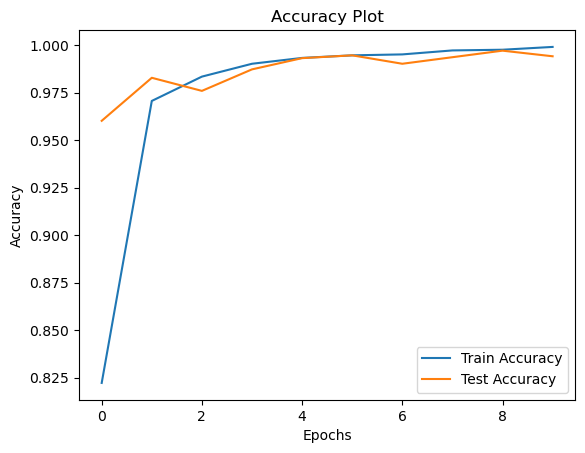

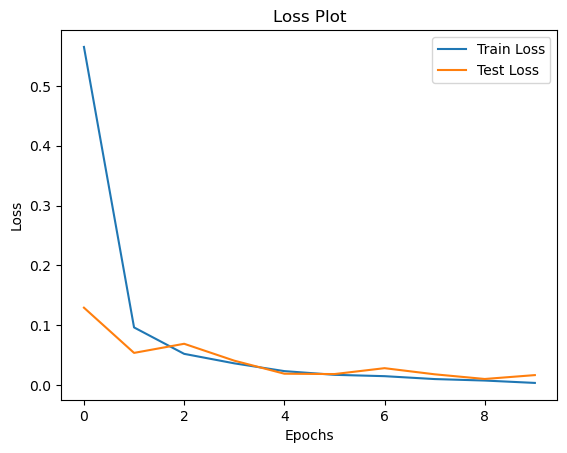

In [7]:
# Plot accuracy and loss
def plot_metrics(history):
    # Accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Plot')
    plt.show()

    # Loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Plot')
    plt.show()

plot_metrics(history)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[221   0   0   0   0   0   0   0   0   0]
 [  0 205   0   0   0   0   0   0   0   1]
 [  0   0 198   1   0   0   0   0   0   1]
 [  0   0   0 216   0   1   0   0   0   0]
 [  0   0   0   0 201   0   0   0   0   0]
 [  0   0   0   1   0 189   0   0   0   0]
 [  0   0   0   0   0   0 203   0   0   0]
 [  0   6   0   1   0   0   0 189   1   1]
 [  0   0   0   0   0   0   0   0 200   0]
 [  0   0   0   0   0   0   0   0   0 196]]


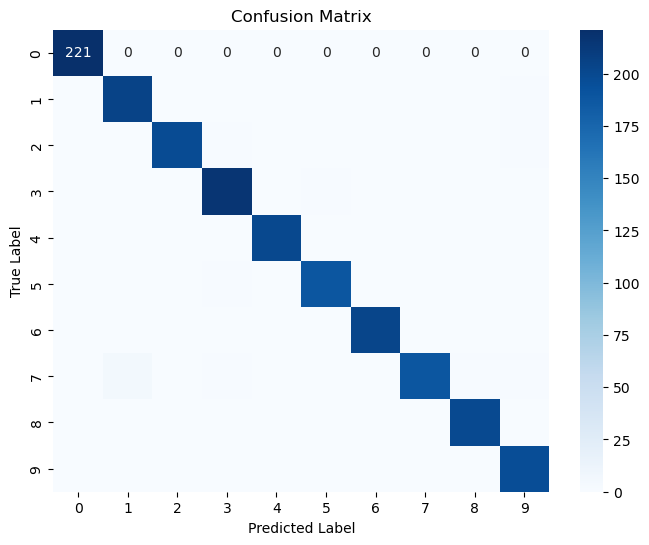

In [11]:
# Generate confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class labels

# True class labels (from the test set)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integer labels

# Generate the classification report
report = classification_report(y_true, y_pred_classes)

# Print the classification report
print("Classification Report:\n", report)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       221
           1       0.99      1.00      1.00       206
           2       1.00      1.00      1.00       200
           3       0.99      1.00      0.99       217
           4       0.99      1.00      1.00       201
           5       1.00      0.99      1.00       190
           6       1.00      1.00      1.00       203
           7       1.00      0.98      0.99       198
           8       1.00      0.98      0.99       200
           9       0.98      1.00      0.99       196

    accuracy                           0.99      2032
   macro avg       0.99      0.99      0.99      2032
weighted avg       0.99      0.99      0.99      2032



In [ ]:
# Real-time digit detection using OpenCV and CNN
cap = cv2.VideoCapture(0)  # Use the default camera
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (28, 28))  # Resize to match model input size
    gray = gray / 255.0  # Normalize the image
    gray = gray.reshape(1, 28, 28, 1)
    
    # Predict the digit
    prediction = model.predict(gray)
    digit = np.argmax(prediction)
    
    # Display the predicted digit
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, f'Digit: {digit}', (50, 50), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
    
    cv2.imshow("Real-Time Digit Detection", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

Misclassified Samples: 14
True Label: 2, Predicted: 3


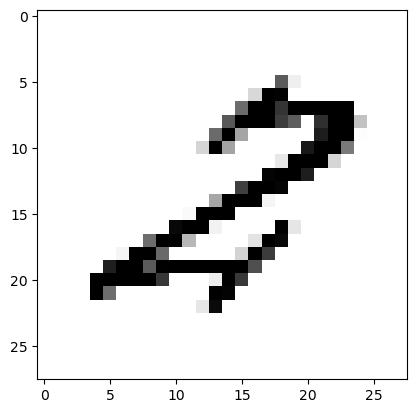

True Label: 7, Predicted: 1


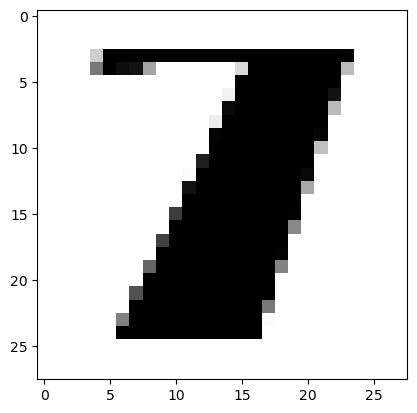

True Label: 7, Predicted: 1


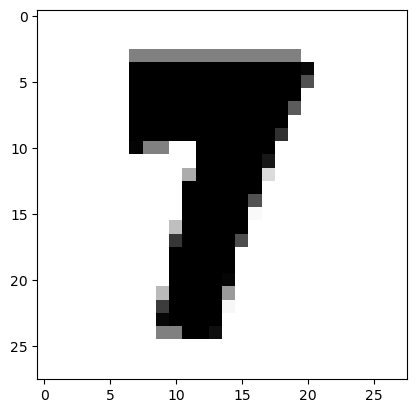

True Label: 7, Predicted: 9


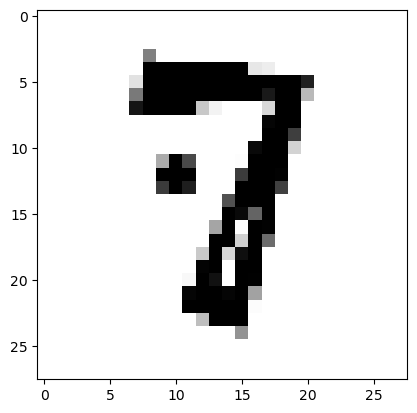

True Label: 7, Predicted: 8


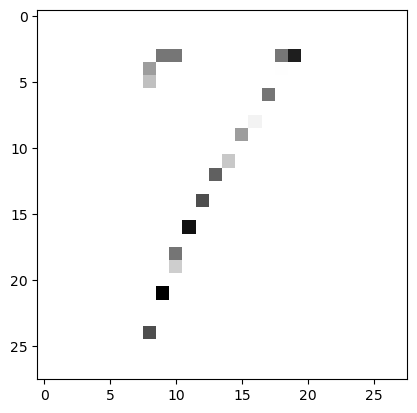

In [15]:
# Identify misclassified indices
misclassified_indices = np.where(y_true != y_pred_classes)[0]

# Print misclassified samples
print(f"Misclassified Samples: {len(misclassified_indices)}")
for i in misclassified_indices[:5]:  # Show first 5 misclassified examples
    print(f"True Label: {y_true[i]}, Predicted: {y_pred_classes[i]}")
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Assuming 28x28 input images
    plt.show()


In [16]:
# Check class distribution in true labels
true_class_distribution = np.unique(y_true, return_counts=True)
print("True Label Distribution:", dict(zip(*true_class_distribution)))

# Check class distribution in predicted labels
pred_class_distribution = np.unique(y_pred_classes, return_counts=True)
print("Predicted Label Distribution:", dict(zip(*pred_class_distribution)))


True Label Distribution: {0: 221, 1: 206, 2: 200, 3: 217, 4: 201, 5: 190, 6: 203, 7: 198, 8: 200, 9: 196}
Predicted Label Distribution: {0: 221, 1: 211, 2: 198, 3: 219, 4: 201, 5: 190, 6: 203, 7: 189, 8: 201, 9: 199}
